In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set d

## Module Importing

In [3]:
import pandas as pd

#Numerical Computation
import numpy as np

#to deal with files
import os 

#data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Audio library files
import librosa
import librosa.display

#Audio Player
from IPython.display import Audio

#to ignore warnings
import warnings 
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
#splits audio file names into a label and a path, for easier reading
paths = []
labels= []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split("_")[-1]
        label = label.split(".")[0]
        labels.append(label.lower())
        
print("The Dataset has been loaded!")


The Dataset has been loaded!


In [5]:
#prints first five audio paths
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [6]:
#prints first 5 asssociated labels
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [7]:
#New dataframe

df = pd.DataFrame()
df["audio_paths"] = paths
df["label"] = labels
df.head(10)

,audio_paths,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear
5,/kaggle/input/toronto-emotional-speech-set-tes...,fear
6,/kaggle/input/toronto-emotional-speech-set-tes...,fear
7,/kaggle/input/toronto-emotional-speech-set-tes...,fear
8,/kaggle/input/toronto-emotional-speech-set-tes...,fear
9,/kaggle/input/toronto-emotional-speech-set-tes...,fear


## Data Analysis + Audio Visualization


In [8]:
df["label"].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

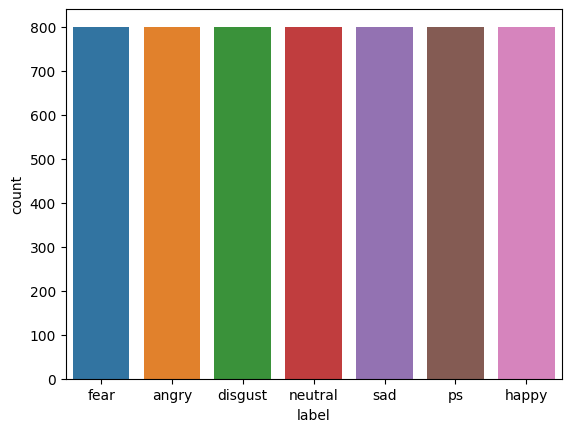

In [9]:
#Shows equal distribution
sns.countplot(x=df["label"])

In [10]:
#waveplot graph
def waveplot(data,sr,emotion):
    plt.figure(figsize = (10,5))
    plt.title(emotion,size=15)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
#spectogram graph    
def spectogram(data,sr,emotion):
    
    #time frequency representation
    x=librosa.stft(data)
    
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (10,5))
    plt.title(emotion,size=15)
    librosa.display.specshow(xdb,sr=sr,x_axis = "time",y_axis = "hz")
    plt.colorbar()
    

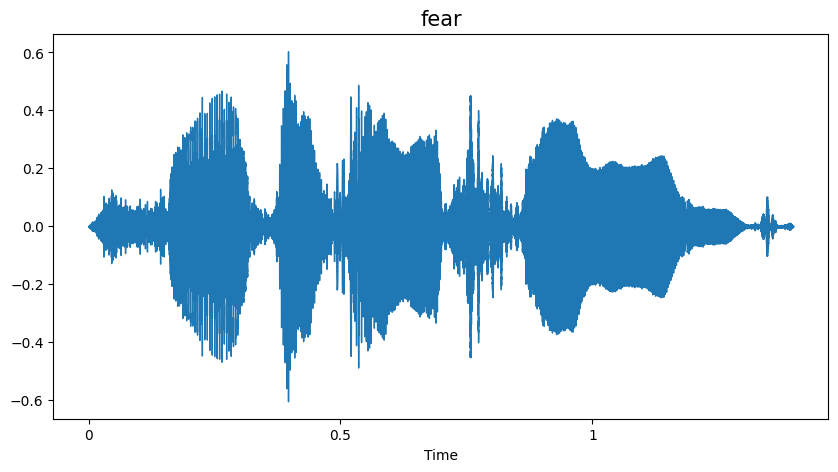

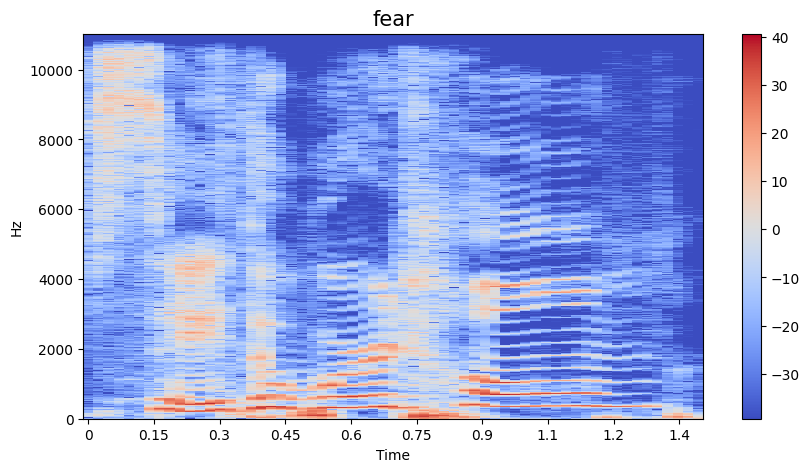

In [11]:
emotion = "fear"
path = np.array(df["audio_paths"][df["label"] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

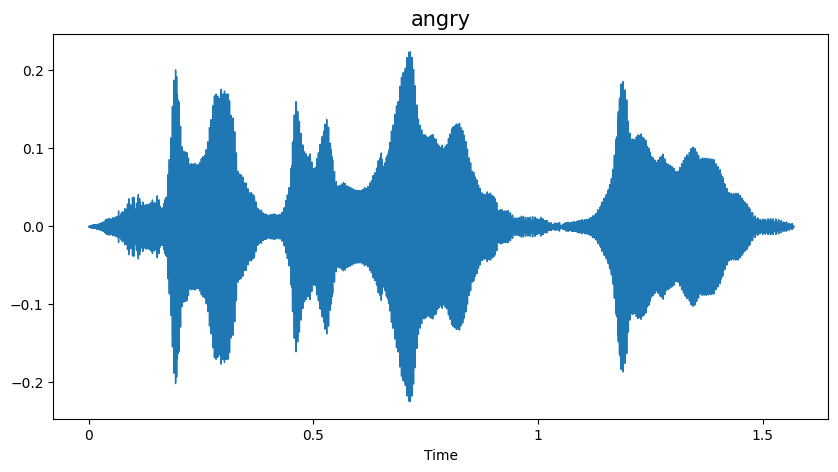

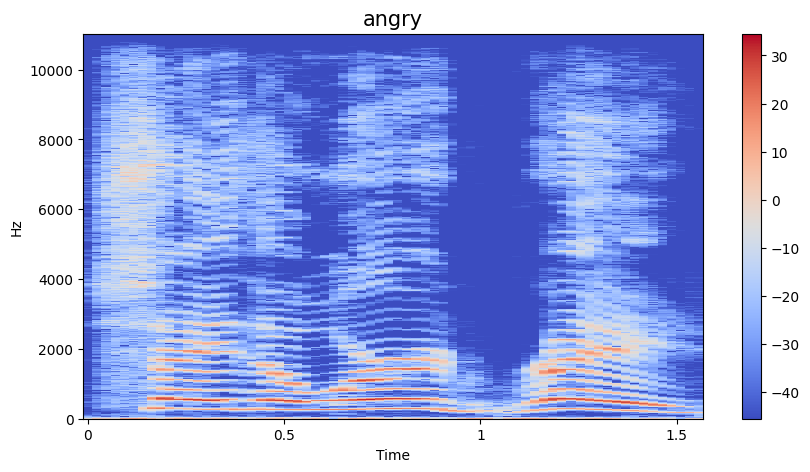

In [12]:
emotion = "angry"
path = np.array(df["audio_paths"][df["label"] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

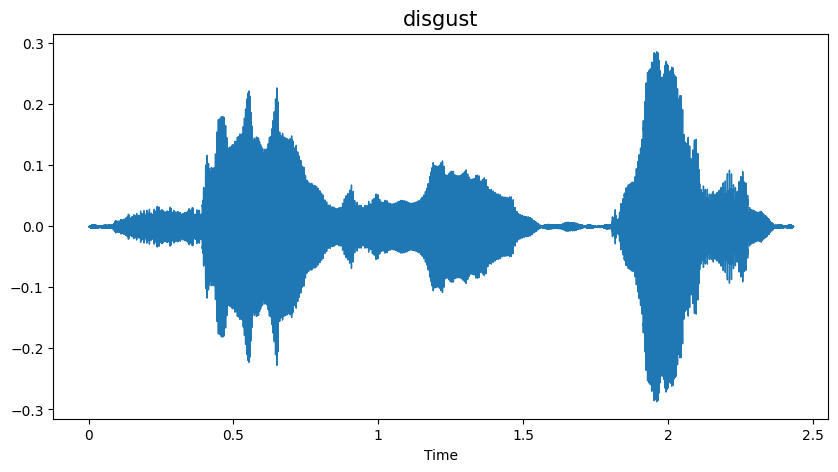

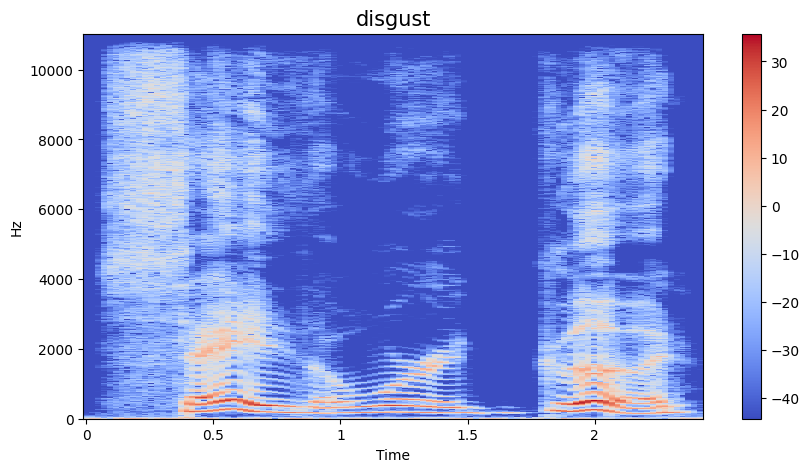

In [13]:
emotion = "disgust"
path = np.array(df["audio_paths"][df["label"] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

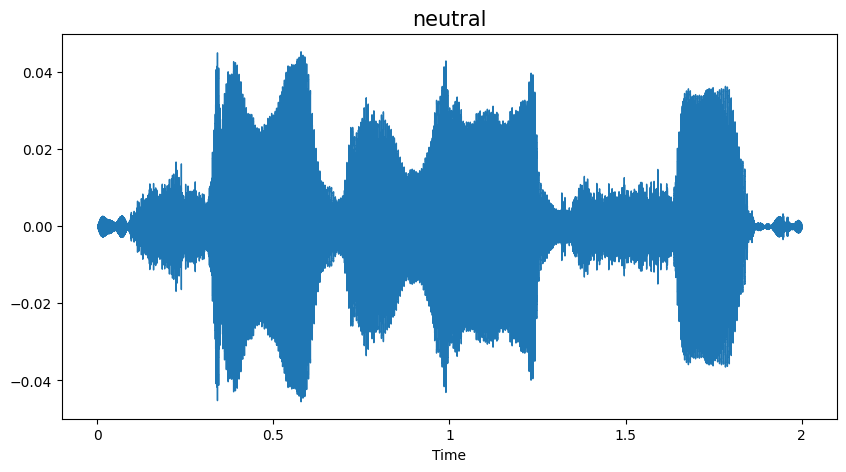

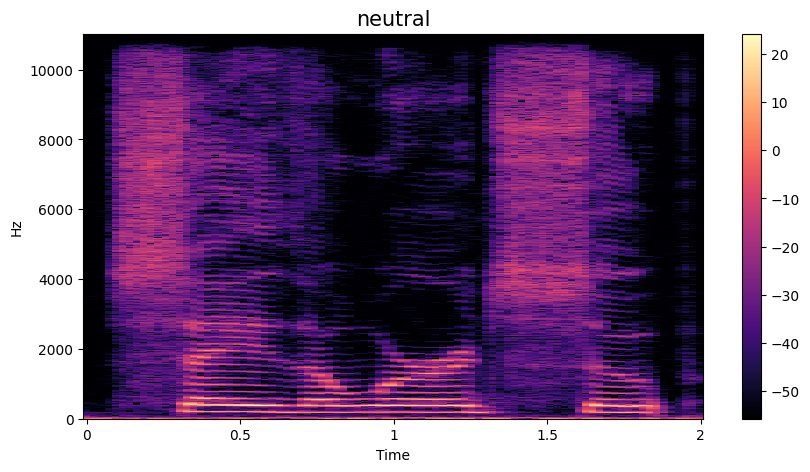

In [14]:
emotion = "neutral"
path = np.array(df["audio_paths"][df["label"] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

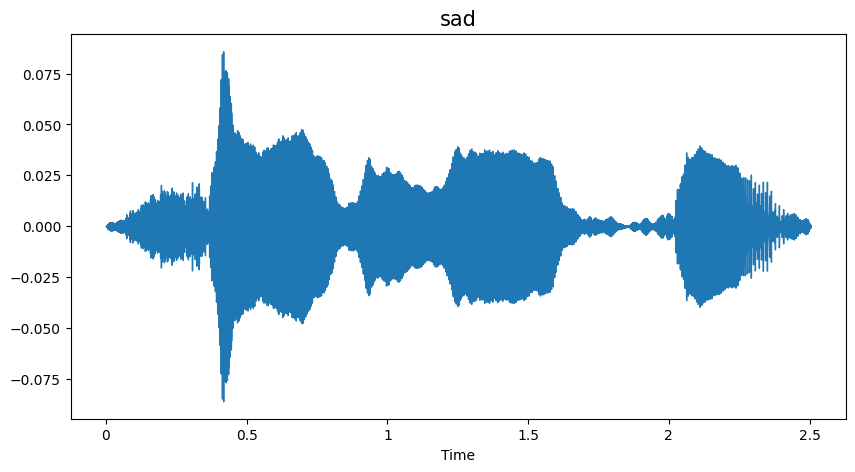

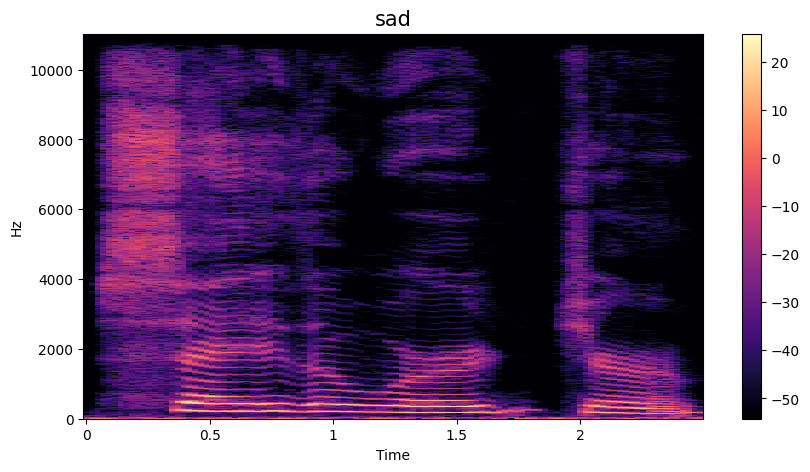

In [15]:
emotion = "sad"
path = np.array(df["audio_paths"][df["label"] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

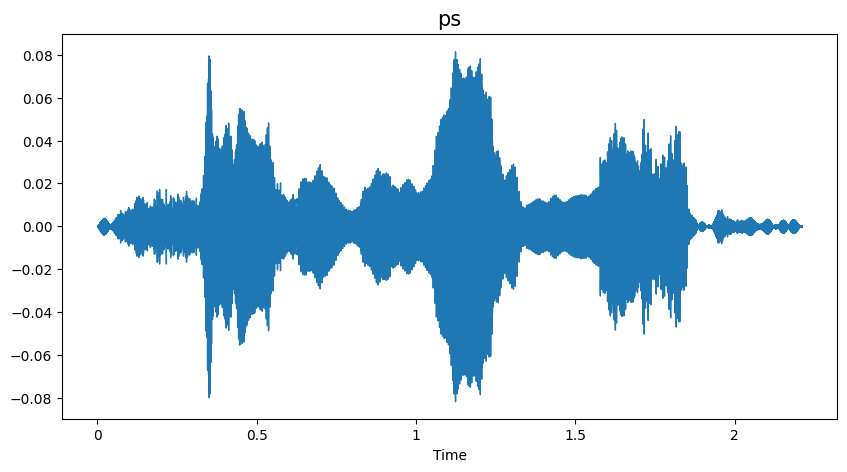

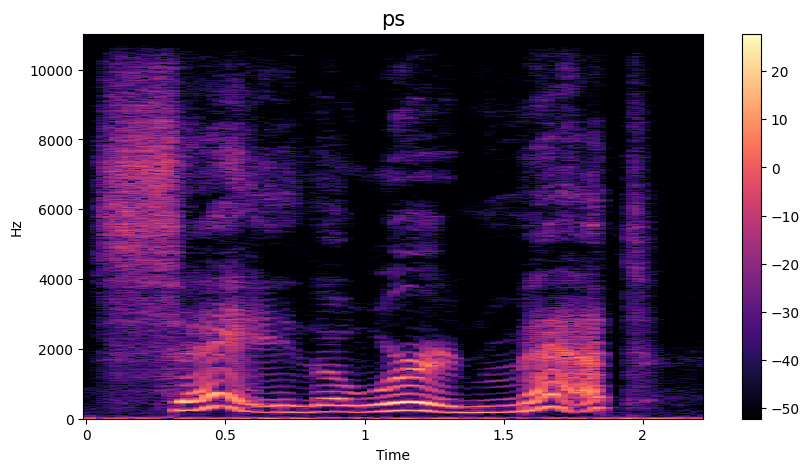

In [16]:
emotion = "ps"
path = np.array(df["audio_paths"][df["label"] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

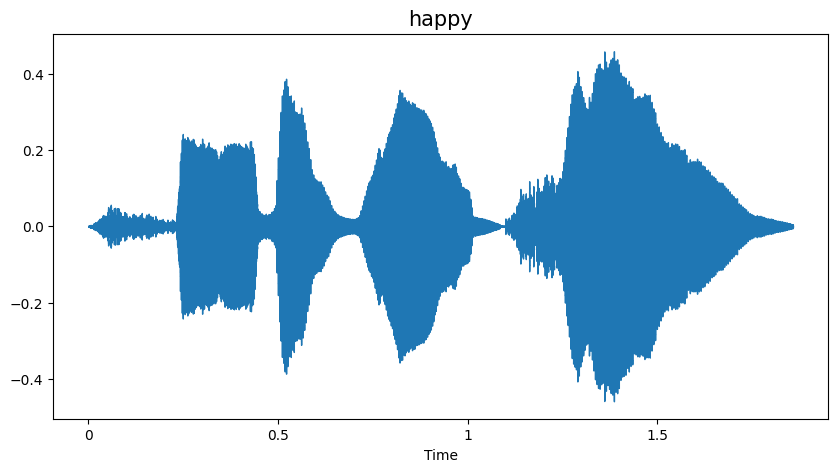

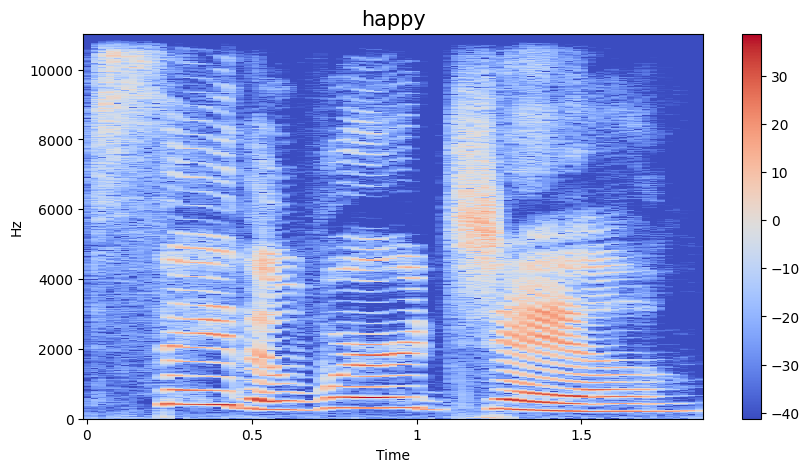

In [17]:
emotion = "happy"
path = np.array(df["audio_paths"][df["label"] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

## Feature Extracting

In [18]:
#loading data and sampling rate 
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [19]:
extract_mfcc(df['audio_paths'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [20]:
#lambda function used to extract appropriate mfcc features for each audio file
X_mfcc=df["audio_paths"].apply(lambda x: extract_mfcc(x))

In [21]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: audio_paths, Length: 5600, dtype: object

In [22]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [23]:
#Input split
X = np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [24]:
#Converts category names into numbers (to be fed to model)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [25]:
y = y.toarray()
y.shape

(5600, 7)

## LTSM Model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [34]:
#Model ____ using X's Shape
model = Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)), 
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#Model Training
history = model.fit(X,y, validation_split=0.2, epochs = 50, batch_size = 64, shuffle=True)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5598 - loss: 1.2159 - val_accuracy: 0.7795 - val_loss: 0.6055
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8983 - loss: 0.3041 - val_accuracy: 0.9420 - val_loss: 0.1880
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9567 - loss: 0.1546 - val_accuracy: 0.7866 - val_loss: 0.5914
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9642 - loss: 0.1120 - val_accuracy: 0.9857 - val_loss: 0.0652
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9652 - loss: 0.1158 - val_accuracy: 0.9848 - val_loss: 0.0527
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9708 - loss: 0.0871 - val_accuracy: 0.9875 - val_loss: 0.0425
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9814 - loss: 0.0633 - val_accuracy: 0.9705 - val_loss: 0.0894
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9801 - loss: 0.0611 - val_accuracy: 0.9857 - val_loss

## Results Visualization 

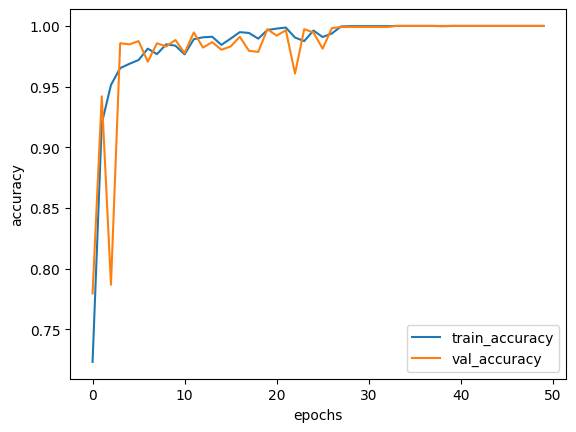

In [38]:
#creates graph for the accuracy each time the dataset is passed through the model
epochs=list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train_accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


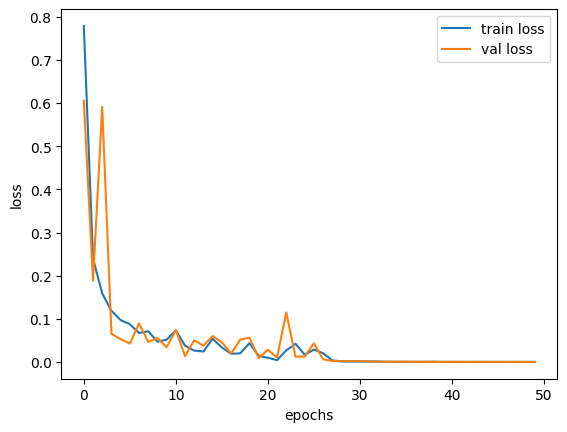

In [42]:
acc = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, acc, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
